# <span style= "color:blue">  Alcohol by Volume as a Predictor of Calories in Beer </span>

In the US and many other countries, calories are not required by law to be reported on alcoholic products. So if you were to order a pint (U.S, 16 oz) of Old Rasputin Imperial Stout, you might be unpleasantly surprised to find that you were consuming 400 calories. So maybe you don't drink two pints. An even better reason is that it has an ABV of 9%


In [346]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import ticker as mtick
from matplotlib.ticker import PercentFormatter

from matplotlib.ticker import FormatStrFormatter

## Data set
To answer some of these questions, we need data on abv, calories per serving ( normalized), carbs, beer style may also be of use. I found an on-line database with such information,https://www.realbeer.com/edu/health/calories.php, and downloaded it to a csv format. I also have additional data points from a similar site that is included. 

Here are the columns and descriptions:

* beer- the name of the beer
* Style - the type of beer it is
* brewery - the brewery that makes the beer
* location - this denotes if it was brewed domestically in the U.S. or imported
* alcohol - denotes the percent alcohol by volume (ABV) for the beer
* calories - the number of calories per 12 ounce serving
* carbs - the number of grams of carbs per 12 ounce serving


## Import the data
Let's import and look at the data.

In [347]:
File = 'BeerData_wcarbs.csv'
df1 = pd.read_csv(File, usecols=['beer', 'Style', 'brewery', 'location', 'alcohol', 'calories', 'carbs'])

In [348]:
# Let's inspect the data
df1.head()

,beer,Style,brewery,location,alcohol,calories,carbs
0,60 Minute IPA,IPA,DogfishHead,Domestic,0.060,209,NaN
1,American Amber Lager,Lager,Straub Brewery,Domestic,0.041,136,10.5g
2,American Lager,Lager,Straub Brewery,Domestic,0.041,132,10.5g
3,American Light,Light,Straub Brewery,Domestic,0.032,96,7.6g
4,Amstel Light,Light,Amstel Light,Imported,0.035,95,5


In [349]:
mask = df1.duplicated()  #finds duplicate records/rows in the data
if df1[mask].empty:
    print('No duplicates') # If no duplicates exist, prints 'no duplicates'

No duplicates


## Inspection
The columns are pretty clean looking at first glance, but below I did an aggregation to see more. We find the carbs column is a mixed bag of data types and a few Styles could be clarified (like TBD and Unknown can be consolidated and Non can be spelled out as Non-Alcoholic)

In [388]:
styles = df1.groupby('Style').agg({'Style': 'count', 'alcohol': 'mean', 'calories': 'mean'}).rename(columns ={'Style': 'count'}).reset_index().sort_values(by='count', ascending = False)
styles['alcohol'] = styles['alcohol'].round(3)
styles['calories'] = styles['calories'].round()
styles.rename(columns = {'Style':'style'}, inplace= True)

display (styles)

#bar_graf = plt.bar(styles['Style'], styles['count'])
#plt.xticks(rotation=55)
#display(bar_graf)



,style,count,alcohol,calories
19,Lager,50,0.049,148.0
20,Light,46,0.040,105.0
16,IPA,19,0.068,204.0
30,Stout,14,0.058,187.0
27,Red,14,0.053,171.0
34,Wheat,12,0.050,156.0
24,Pale Ale,12,0.050,160.0
0,Ale,11,0.058,188.0
25,Pilsner,10,0.048,143.0
21,Malt,9,0.065,181.0


## Clean the Data

* First, let's change the column names to all lower case except 'alcohol', which is renamed "ABV", for Alcohol by Volume. 
* Next, note the carb data has some text, some integers, some floats and NaNs. Let's change to float.
* Then change styles that have names "TBD" to "Unknown" and "Non" to "Non-Alcoholic" 



In [351]:
df2 = df1.copy()

df2.rename(columns={'Style': 'style', 'alcohol': 'ABV'}, inplace=True) # renames columns

df2['carbs'] = pd.to_numeric(df2['carbs'].str.replace('g', ''), errors='coerce') # removes text, changes type to float

df2['style'] = np.where(df2['style'] == 'TBD', 'Unknown', df2['style'])  # renames any 'TBD' style
df2['style'] = np.where(df2['style'] == 'Non', 'Non-Alcoholic', df2['style'])  # renames any 'Non' style

#display(df2.head())

x = df2.groupby('style').agg({'style': 'count', 'ABV': 'mean', 'calories': 'mean', 'carbs': 'mean'}).rename(columns={'style': 'count'}).reset_index()
display(x)

,style,count,ABV,calories,carbs
0,Ale,11,0.058127,188.454545,16.950000
1,Amber Ale,3,0.056667,172.666667,12.100000
2,Barleywine Ale,1,0.099000,330.000000,30.300000
3,Belgian White,1,0.052000,155.000000,13.700000
4,Blonde,6,0.048667,146.500000,11.340000
5,Bock,5,0.064200,200.000000,15.733333
6,Brown,5,0.051200,172.000000,16.750000
7,Cream Ale,2,0.051500,156.000000,15.000000
8,Doppelbock,1,0.067000,260.000000,23.000000
9,English Ale,2,0.061000,174.500000,12.300000


## <span style="color:teal">Outliers </span>
Now that the data is mostly clean, I want to check for outliers:

* view box plot of data
* find and inspect outliers to determine if an outlier
* remove if needed

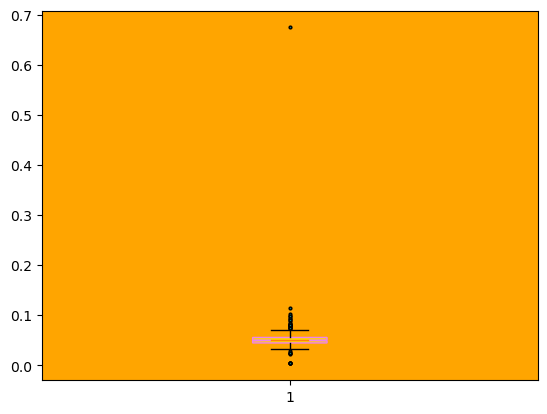

In [352]:
# This is code to generate a box plot
outliers = plt.boxplot([df2['ABV']], notch = True, patch_artist=True, 
                       flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor': 'teal'},
                      boxprops ={'facecolor':'gold', 'color' :'violet'})
plt.gca().set_facecolor('orange')

## <span style="color:teal">Outliers </span>
There is one fairly substantial outlier that we can see by itself at the top of the box plot graph. It's so far out of range, you can't even see the other points (but we will see them in a subsequent graph).

The following code will identify that record and other potential outliers in the upper range

In [353]:
# The following lines find the Inner Quartile Range, or IQR, and then creates a boolean mask to find the records that are outside the upper range
Q1 = np.percentile(df2['ABV'], 25, method = 'midpoint')
Q3 = np.percentile(df2['ABV'], 75, method = 'midpoint')
IQR= Q3 - Q1           # the Inner Quartile Range is the difference of quartiles 3 and 1
Up = Q3 + (1.5 * IQR)  # The upper range typically is 1.5 greater than the IQR
Low = Q1 - (1.5 * IQR) # The lower range typically is 1.5 less than the IQR

mask_out = df2['ABV'] > Up       #creates a mask for record higher than the Upper quartile range
Outlier_records =  df2[mask_out].sort_values(by='ABV', ascending=False)  #selects record based on the mask, mask_out
display(Outlier_records)

,beer,style,brewery,location,ABV,calories,carbs
316,Snake Venom,Unknown,Brewmeister,Imported,0.675,2050,NaN
79,Flying Dog Double Dog,IPA,Flying Dog Brewery,Domestic,0.115,313,16.6
192,Narwhal Imperial Stout,Imperial Stout,Sierra Nevada,Domestic,0.102,344,NaN
90,Flying Dog Wild Dog: Coffee Stout,Stout,Flying Dog Brewery,Domestic,0.099,288,20.2
261,Sierra Nevada Bigfoot,Barleywine Ale,Sierra Nevada,Domestic,0.099,330,30.3
157,McEwans Scotch Ale,Scotch Ale,Scottish & Newcastle (Scotland),Imported,0.095,295,NaN
81,Flying Dog Gonzo,Porter,Flying Dog Brewery,Domestic,0.092,271,18.9
206,Old Rasputin Imperial Russian Stout,Imperial Stout,North Coast Brewing Co.,Domestic,0.090,300,NaN
154,Luky 13 Mondo Large Red Ale,Red,Lagunitas Brewing Co,Domestic,0.088,264,NaN
240,Sam Adams Double Bock,Bock,Sam Adams,Domestic,0.085,240,NaN


### <span style="color:orange"> Outlier Detected </span>
The list above is sorted by ABV, decending. Upon inspection, we find the offending brew is **Snake Venom** with an ABV of **67.5%**.  <span style="color:red"> Yowzer </span>. And calories of **2050** for 12 oz. This is more like a whiskey.

If we research what style Snake Venom is, a quick web search reveals it as an "extreme beer". So out it goes. 

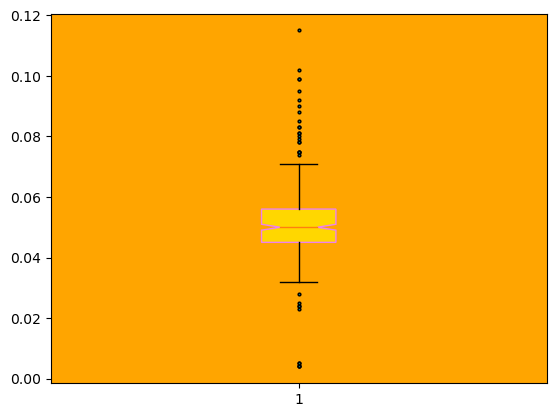

In [390]:
snakevenom_mask = df2['ABV']<.20
df3=df2[snakevenom_mask]

outliers = plt.boxplot([df3['ABV']], notch = True, patch_artist=True, 
                       flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor': 'teal'},
                      boxprops ={'facecolor':'gold', 'color' :'violet'})
plt.gca().set_facecolor('orange')

## Outliers -lower
The chart looks better, but we see a few more outliers in the lower quartile. So I repeated the process

In [355]:
Q1 = np.percentile(df3['ABV'], 25, method = 'midpoint')
Q3 = np.percentile(df3['ABV'], 75, method = 'midpoint')
IQR= Q3 - Q1           # the Inner Quartile Range is the difference of quartiles 1 and 3
Up = Q3 + (1.5 * IQR)  # The upper range typically is 1.5 greater than the IQR
Low = Q1 - (1.5 * IQR) # The lower range typically is 1.5 less than the IQR

mask_out_l = df3['ABV'] < Low       #creates a mask for record lower than the Lower quartile range
Outlier_records_l =  df3[mask_out_l].sort_values(by='ABV', ascending=False)  #selects record based on the mask, mask_out
display(Outlier_records_l)

,beer,style,brewery,location,ABV,calories,carbs
173,Miller Genuine Draft “64”,NaN,MillerCoors,Domestic,0.0280,64,2.4
212,Pabst Extra Light Low Alcohol,Light,Pabst,Domestic,0.0250,67,NaN
188,Molson Light,Light,Molson (Canada),Imported,0.0241,82,NaN
44,Budweiser Select 55,Light,Budweiser,Domestic,0.0240,55,1.9
19,Beck’s Light,Light,Brauerei Beck (Germany),Imported,0.0230,64,3.9
61,Coors NA,Non-Alcoholic,Coors,Domestic,0.0050,73,14.2
281,St. Pauli Girl N.A.,Non-Alcoholic,St. Pauli Girl,Imported,0.0050,96,23.0
56,Clausthaler,Non-Alcoholic,Clausthaler,Unk,0.0040,96,5.8
201,O'Douls,Non-Alcoholic,O'Douls,Unk,0.0040,70,13.3
202,O'Douls Amber,Non-Alcoholic,O'Douls,Unk,0.0040,90,18.0


## Outliers Conclusion
By inspection we can see that there are non-alcoholic beers that are at the far end of the outliers. I am electing to drop these since the ABV is almost none and it is not a typical beer style. 

I am electing to keep the heavier ABV beers, with the exception of Snake Venom, since they represent a good number of the darker beer families. Similarly, I am keeping the Light beers or anything > 0.5% ABV since that is the legal ceiling for non-alcoholic beverages.

In [389]:
# This code creates a mask for the non-alcoholic beers and selects records that are greater than .05% ABV
nonalcohol_mask = df3['ABV']>.005
df3=df3[nonalcohol_mask]

# Exploration

what is the relationship of ABV to calories, if any. Lets look at a scatterplot

array([[1.        , 0.88942958],
       [0.88942958, 1.        ]])

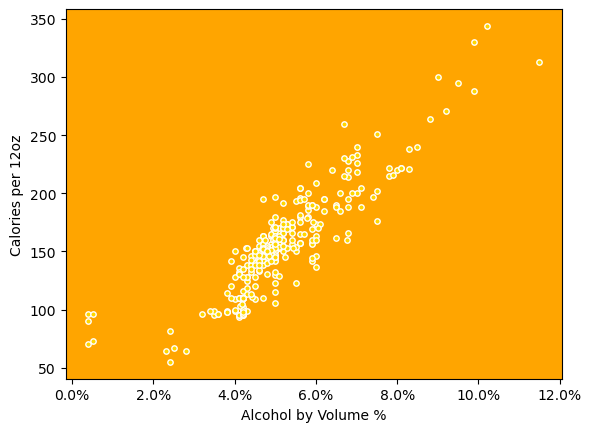

In [399]:
pl = scatter(df3['ABV'], df3['calories'], s=15, edgecolors='white', facecolors='gold')  # s is the marker size


ylabel ('Calories per 12oz')
xlabel ('Alcohol by Volume %')

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.gca().set_facecolor("orange")

np.corrcoef(df3['ABV'], df3['calories'], rowvar=False)


The visualization tells a compelling story for ABV as a predictor of calories in beer and makes a strong case for buildling a predictive model using regression.

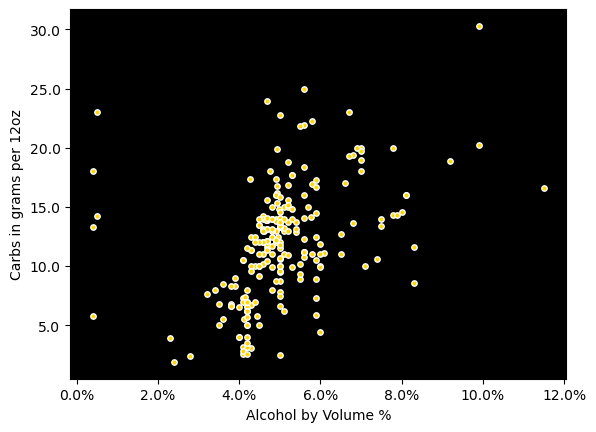

In [398]:
# This code removes records with NaN values in 'carbs' and creates a scatterplot

df_carb= df3[df3['carbs'].apply(lambda x: not np.isnan(x))]

pl = scatter(df_carb['ABV'], df_carb['carbs'], s=15, edgecolors='white', facecolors='gold')  # s is the marker size


ylabel ('Carbs in grams per 12oz')
xlabel ('Alcohol by Volume %')

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().set_facecolor("black")


In [402]:
corr_carbs_ABV = pd.DataFrame(np.corrcoef(df_carb['ABV'], df_carb['carbs'], rowvar=False))
display(corr_carbs_ABV)

,0,1
0,1.000000,0.422493
1,0.422493,1.000000


## <span style="color:teal">Regression </span>
Now we can create a linear regression model to fit the data. 

In [337]:
def linreg_fit(x, y):
    """Returns (alpha, beta) s.t. y ~ alpha*x + beta."""
    from numpy import ones
    m = len(x) ; assert len(y) == m
    ###
    u=ones(m)    # creates an array of ones from m, or the length of x.
    alpha = x.dot(y)- ((1/m)*((u.dot(x))*u.dot(y)))   
    alpha /= x.dot(x) - ((u.dot(x))**2)/m
    
    beta = u.dot(y - alpha*x)/m
    ###

    return (alpha, beta)

x, y = df3['ABV'], df3['calories']

alpha, beta = linreg_fit(x, y)

print("alpha:", alpha)
print("beta:", beta)

alpha: 3019.9606381985213
beta: -0.3454502903443154


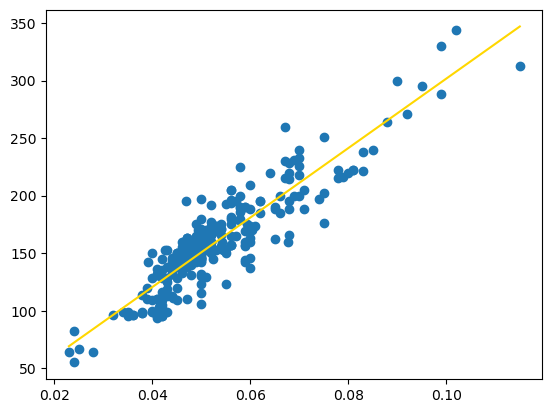

In [338]:
x_fit = np.linspace(max(x), min(x))
y_fit = alpha*x_fit + beta

# try to re-do this in matplotlib
plot(x_fit, y_fit, 'gold')
scatter(x,y,)